In [38]:
from qiskit import *
from qiskit.tools.visualization import plot_distribution
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

Quantum Teleporation is a protocol that sends qubits to a distant location without physically sending the qubit itself (rather its *quantum information*), achieved by using a classical channel and previously shared entanglement between the sender and receiver. 

# Construction and Insight:

In classical communication, the act of copying and pastig information is trivial. However, in quantum mechanics, the *No-Cloning Theorem* states that it is impossible to create an identical copy of an arbitrary unknown quantum state. If we were to copy a quantum state, we would have to create a copy of each of the states in the superposition, which is **impossible.**

In [39]:
circuit = QuantumCircuit(3, 3) # 3 qubits, 3 classical bits

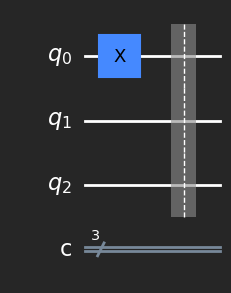

In [40]:
circuit.x(0)
circuit.barrier()
circuit.draw(output = 'mpl', style = 'iqx-dark')

After this barrier, our teleportation protocol commences. We need to first entangle the second (control) qubit $q_1$ and the third (target) qubit $q_2$. This can be achieved by introducing a Hadamard Gate on $q_0$ and an X-Gate from $q_1$ to $q_2$:

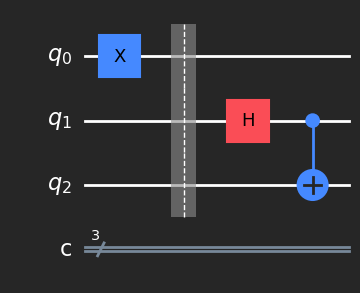

In [41]:
circuit.h(1)
circuit.cx(1, 2) # Control qubit 1, target qubit 2
circuit.draw(output = 'mpl', style = 'iqx-dark')

The rest of the procol dictates us to apply another X-Gate from $q_0$ to $q_1$, and another Hadamard Gate on $q_0$:

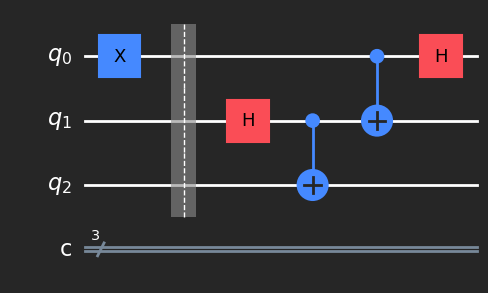

In [42]:
circuit.cx(0, 1) # Control qubit 0, target qubit 1
circuit.h(0)
circuit.draw(output = 'mpl', style = 'iqx-dark')

# Measurement and Output:

A barrier usually isn't necessary in terms of functionality, but it does help us see what's happening a little better. So let's add another barrier before measurement:

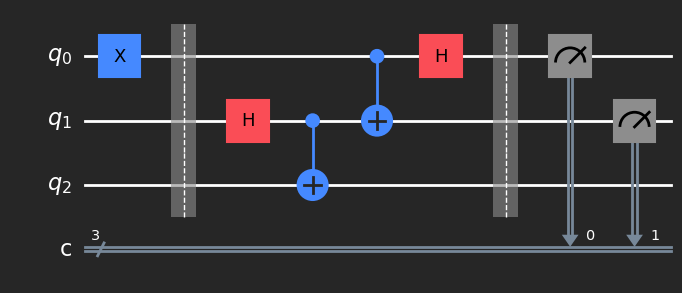

In [43]:
circuit.barrier()
circuit.measure([0, 1], [0, 1]) # Measure qubits 0 and 1, store in classical bits 0 and 1
circuit.draw(output = 'mpl', style = 'iqx-dark')

## Additional Postmeasurement operations:
1. Yet another barrier,
2. Add another X-Gate from $q_1$ to $q_2$, 
3. Add a **CZ-Gate** on $q_0$ and $q_2$, and
4. Measure $q_2$ and store the result in a classical register.

Here the **2-qubit** CZ Gate (or Contrlled-Z Gate) is represented by the matrix $$\mathrm{CZ}=\begin{bmatrix}1 & 0 & 0 & 0 \\0 & 1 & 0 & 0 \\0 & 0 & 1 & 0 \\0 & 0 & 0 & -1\end{bmatrix}$$ and so $\mathrm{CZ}\ket{00}=\ket{00}$, $\mathrm{CZ}\ket{01}=\ket{01}$, $\mathrm{CZ}\ket{10}=\ket{10}$, and $\mathrm{CZ}\ket{11}=-\ket{11}$. Hence it represents a **phase-flip/sign change** of the target qubit only if the control qubit is $\ket{1}$.

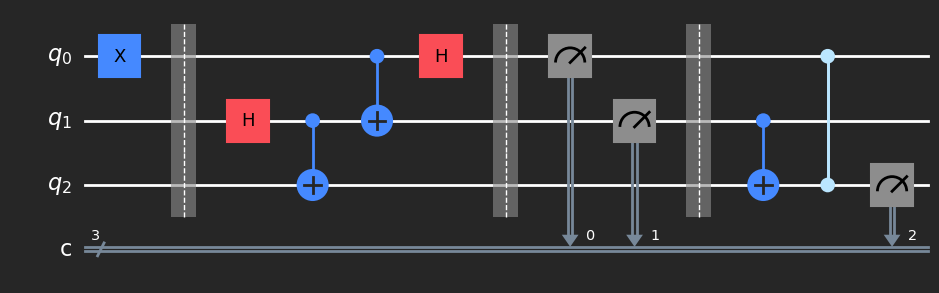

In [44]:
circuit.barrier()
circuit.cx(1, 2) # Control qubit 1, target qubit 2
circuit.cz(0, 2) # Control qubit 0, target qubit 2
circuit.measure(2, 2) # Measure qubit 2, store in classical bit 2

circuit.draw(output = 'mpl', style = 'iqx-dark')

Our protocol claims that the state of $q_0$ is now the **same** as the state of $q_2$ after it teleports to $q_2$. Let's see if this is true:

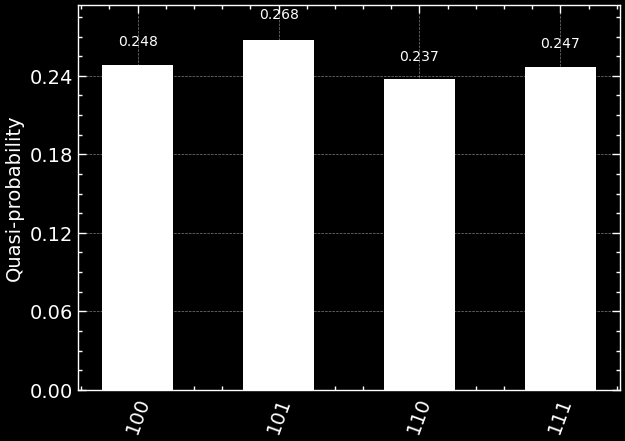

In [45]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend = simulator, shots = 1024).result().get_counts()
plot_distribution(counts, color = 'white')

On the $x$-axis, we have the states $\ket{100}$, $\ket{101}$, $\ket{110}$ and $\ket{111}$ which are represented as $\ket{c_2c_1c_0}$, with $c_2=1$ for **all 4 states.** For all these states the probabilities are rougly equal, so we can't really tell which state it is. However, we can see that the state of $q_0$ is the **same** as the state of $q_2$ after teleportation, which is what we wanted to show.

# Additional Learning:

Let's try both the Plus and Minus States $$\ket{\pm}=\frac{\ket{0}\pm\ket{1}}{\sqrt{2}}$$ for teleportation instead of teleporting the state $\ket{1}$.

## Part 1 - The Plus State:

This simply involves replacing the initial X-Gate with a Hadamard Gate, as instead of $\ket{1}$ we're selecting $\ket{+}$ to be teleported.

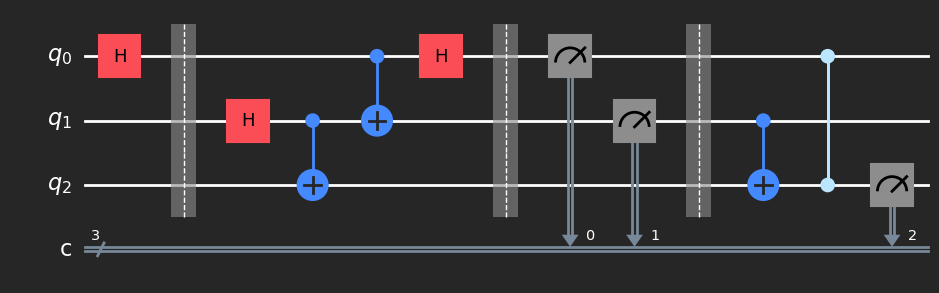

In [46]:
circuit = QuantumCircuit(3, 3) 
circuit.h(0)
circuit.barrier()

circuit.h(1)
circuit.cx(1, 2)
circuit.cx(0, 1) 
circuit.h(0)
circuit.barrier()

circuit.measure([0, 1], [0, 1]) 
circuit.barrier()

circuit.cx(1, 2) 
circuit.cz(0, 2) 
circuit.measure(2, 2)

circuit.draw(output = 'mpl', style = 'iqx-dark')

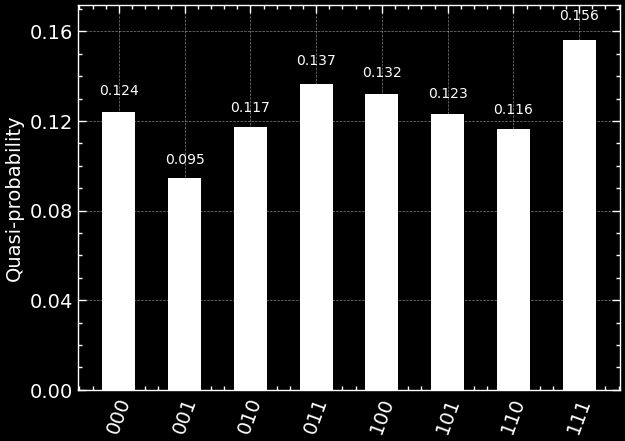

In [47]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend = simulator, shots = 1024).result().get_counts()
plot_distribution(counts, color = 'white')

We get a much wider distribution of states. This is because the Hadamard Gate puts the qubit in a superposition of $\ket{0}$ and $\ket{1}$, so we're teleporting a superposition of $\ket{0}$ and $\ket{1}$. This results in $\ket{c_2c_1c_0}$ with $c_2$ being either $0$ or $1$ for all 8 states with equal probabilities.

## Part-2 - The Minus State:

This is very similar to what we just did, since we just need to create a $\ket{-}$ state initially and then teleport it, done by adding a Hadamard Gate before the initial X-Gate on $q_0$:

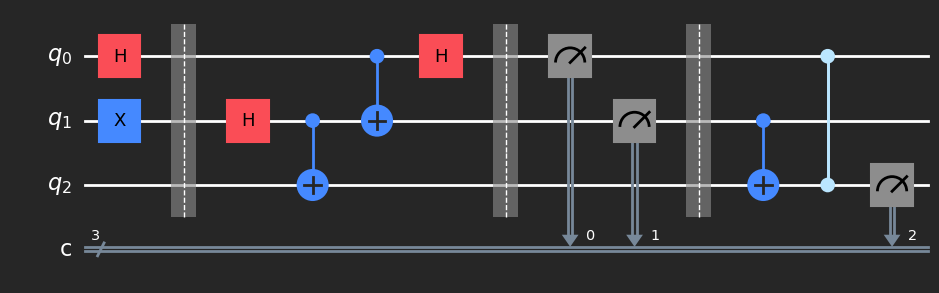

In [48]:
circuit = QuantumCircuit(3, 3) 
circuit.h(0)
circuit.x(1)
circuit.barrier()

circuit.h(1)
circuit.cx(1, 2)
circuit.cx(0, 1) 
circuit.h(0)
circuit.barrier()

circuit.measure([0, 1], [0, 1]) 
circuit.barrier()

circuit.cx(1, 2) 
circuit.cz(0, 2) 
circuit.measure(2, 2)

circuit.draw(output = 'mpl', style = 'iqx-dark')

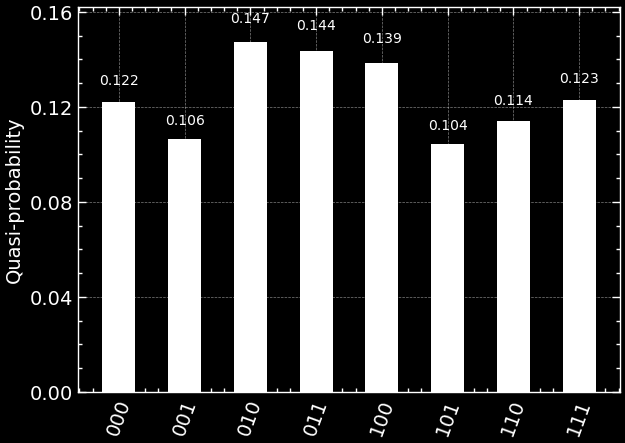

In [49]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend = simulator, shots = 1024).result().get_counts()
plot_distribution(counts, color = 'white')

The distributions can't be distinguished because $c_2$ remains the same for all 8 states, but the state of $q_0$ is the **same** as the state of $q_2$ after teleportation, which is what we wanted to show.